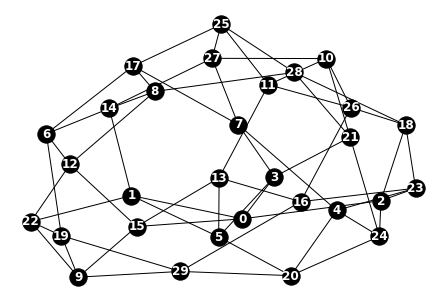

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
G=nx.random_regular_graph(4, 30, seed=None)
pos=nx.spring_layout(G)
nx.draw(G, node_color='black',font_color='white',font_weight='bold',width=1,pos=pos,with_labels=True)

In [2]:
from pyomo.environ import *
import numpy as np
import random 
import pandas as pd

In [3]:
model = AbstractModel()
model.N=Param(mutable=True,initialize=len(G.nodes))
model.E=Param(mutable=True,initialize=len(G.edges))
model.i = RangeSet(0,model.N-1)
model.j = Set(initialize=model.i)
model.L = Param(model.i,model.j, default=0,mutable=True)
model.kolor=RangeSet(1,model.E/4)
model.X = Var(model.i,model.j,model.kolor, initialize=0, domain=Binary)
model.y = Var(within=NonNegativeReals, initialize=0)
                                                     
def rule_C1(model,i,c):
    exi=0
    for j in model.j:
        if value(model.L[i,j])==1:
            exi+=model.X[i,j,c]
        if value(model.L[j,i])==1:
            exi+=model.X[j,i,c]    
    return exi <=1
model.C1 = Constraint(model.i,model.kolor,rule=rule_C1)

def rule_C2(model):
    return model.y>=sum(c*model.X[i,j,c] for c in model.kolor for i in model.i for j in model.j  if (value(model.L[i,j])==1)) 
model.C2 = Constraint(rule=rule_C2)

def rule_C3(model,i,j):
    if value(model.L[i,j])==1:
        return sum(model.X[i,j,c] for c in model.kolor)==1
    else:
        return Constraint.Skip
model.C3 = Constraint(model.i,model.j,rule=rule_C3)
model.OF=Objective(expr=model.y, sense=minimize)
opt = SolverFactory('glpk')
opt.options["mipgap"] = 0

In [4]:
Lines={edg:1 for edg in G.edges}
data = {None: {
    'N': {None: len(G.nodes)},       
    'L': Lines,}}
instance = model.create_instance(data)

In [6]:
results = opt.solve(instance) # solves and updates instance

In [7]:
print('OF= ', value(instance.y))
for i in instance.i:
    for j in instance.j:
        for c in instance.kolor:
            if value(instance.X[i,j,c])>0:
                print((i,j,c),value(instance.X[i,j,c]))

OF=  150.0
(0, 17, 3) 1.0
(1, 6, 2) 1.0
(1, 9, 4) 1.0
(1, 29, 1) 1.0
(2, 8, 2) 1.0
(2, 13, 3) 1.0
(2, 25, 4) 1.0
(3, 13, 2) 1.0
(3, 26, 1) 1.0
(3, 28, 3) 1.0
(4, 17, 4) 1.0
(4, 19, 3) 1.0
(5, 25, 2) 1.0
(6, 20, 3) 1.0
(6, 23, 4) 1.0
(7, 2, 1) 1.0
(7, 12, 2) 1.0
(7, 21, 4) 1.0
(8, 20, 4) 1.0
(8, 27, 3) 1.0
(8, 28, 1) 1.0
(9, 20, 1) 1.0
(10, 27, 4) 1.0
(11, 0, 4) 1.0
(11, 4, 1) 1.0
(11, 9, 3) 1.0
(11, 24, 2) 1.0
(12, 3, 4) 1.0
(12, 5, 1) 1.0
(12, 25, 3) 1.0
(13, 27, 1) 1.0
(14, 10, 2) 1.0
(14, 19, 1) 1.0
(15, 0, 1) 1.0
(15, 4, 2) 1.0
(16, 5, 4) 1.0
(16, 10, 3) 1.0
(16, 20, 2) 1.0
(18, 1, 3) 1.0
(18, 15, 4) 1.0
(18, 22, 2) 1.0
(18, 23, 1) 1.0
(19, 13, 4) 1.0
(19, 27, 2) 1.0
(21, 5, 3) 1.0
(21, 9, 2) 1.0
(21, 17, 1) 1.0
(22, 6, 1) 1.0
(22, 7, 3) 1.0
(22, 14, 4) 1.0
(23, 24, 3) 1.0
(23, 26, 2) 1.0
(24, 16, 1) 1.0
(25, 10, 1) 1.0
(26, 15, 3) 1.0
(26, 29, 4) 1.0
(28, 17, 2) 1.0
(28, 24, 4) 1.0
(29, 0, 2) 1.0
(29, 14, 3) 1.0


In [8]:
print ("The solver returned a status of:"+str(results.solver.status))
from pyomo.opt import SolverStatus, TerminationCondition
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
     print ("this is feasible and optimal")
elif results.solver.termination_condition == TerminationCondition.infeasible:
     print ("do something about it? or exit?")
else:
     print (str(results.solver))

The solver returned a status of:ok
this is feasible and optimal


In [9]:
#instance.C1.pprint()
instance.C2.pprint()
#instance.C3.pprint()
instance.display()
for i in instance.i:
    for j in instance.j:
        if value(instance.L[i,j]) >0:
            print((i,j),value(instance.L[i,j]))

C2 : Size=1, Index=None, Active=True
    Key  : Lower : Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

        Key          : Lower : Value : Upper : Fixed : Stale : Domain
           (0, 0, 1) :     0 :     0 :     1 : False :  True : Binary
           (0, 0, 2) :     0 :     0 :     1 : False :  True : Binary
           (0, 0, 3) :     0 :     0 :     1 : False :  True : Binary
           (0, 0, 4) :     0 :     0 :     1 : False :  True : Binary
           (0, 0, 5) :     0 :     0 :     1 : False :  True : Binary
           (0, 0, 6) :     0 :     0 :     1 : False :  True : Binary
           (0, 0, 7) :     0 :     0 :     1 : False :  True : Binary
           (0, 0, 8) :     0 :     0 :     1 : False :  True : Binary
           (0, 0, 9) :     0 :     0 :     1 : False :  True : Binary
          (0, 0, 10) :     0 :     0 :     1 : False :  True : Binary
          (0, 0, 11) :     0 :     0 :     1 : False :  True : Binary
          (0, 0, 12) :     0 :     0 :     1 : False :  True : Binary
          (0, 0, 13) :     0 :     0 :     1 : False :  True : Binary
          (0, 0, 14)

         (1, 27, 10) :     0 :     0 :     1 : False :  True : Binary
         (1, 27, 11) :     0 :     0 :     1 : False :  True : Binary
         (1, 27, 12) :     0 :     0 :     1 : False :  True : Binary
         (1, 27, 13) :     0 :     0 :     1 : False :  True : Binary
         (1, 27, 14) :     0 :     0 :     1 : False :  True : Binary
         (1, 27, 15) :     0 :     0 :     1 : False :  True : Binary
          (1, 28, 1) :     0 :     0 :     1 : False :  True : Binary
          (1, 28, 2) :     0 :     0 :     1 : False :  True : Binary
          (1, 28, 3) :     0 :     0 :     1 : False :  True : Binary
          (1, 28, 4) :     0 :     0 :     1 : False :  True : Binary
          (1, 28, 5) :     0 :     0 :     1 : False :  True : Binary
          (1, 28, 6) :     0 :     0 :     1 : False :  True : Binary
          (1, 28, 7) :     0 :     0 :     1 : False :  True : Binary
          (1, 28, 8) :     0 :     0 :     1 : False :  True : Binary
          (1, 28, 9)

           (3, 0, 3) :     0 :     0 :     1 : False :  True : Binary
           (3, 0, 4) :     0 :     0 :     1 : False :  True : Binary
           (3, 0, 5) :     0 :     0 :     1 : False :  True : Binary
           (3, 0, 6) :     0 :     0 :     1 : False :  True : Binary
           (3, 0, 7) :     0 :     0 :     1 : False :  True : Binary
           (3, 0, 8) :     0 :     0 :     1 : False :  True : Binary
           (3, 0, 9) :     0 :     0 :     1 : False :  True : Binary
          (3, 0, 10) :     0 :     0 :     1 : False :  True : Binary
          (3, 0, 11) :     0 :     0 :     1 : False :  True : Binary
          (3, 0, 12) :     0 :     0 :     1 : False :  True : Binary
          (3, 0, 13) :     0 :     0 :     1 : False :  True : Binary
          (3, 0, 14) :     0 :     0 :     1 : False :  True : Binary
          (3, 0, 15) :     0 :     0 :     1 : False :  True : Binary
           (3, 1, 1) :     0 :     0 :     1 : False :  True : Binary
           (3, 1, 2)

           (4, 4, 4) :     0 :     0 :     1 : False :  True : Binary
           (4, 4, 5) :     0 :     0 :     1 : False :  True : Binary
           (4, 4, 6) :     0 :     0 :     1 : False :  True : Binary
           (4, 4, 7) :     0 :     0 :     1 : False :  True : Binary
           (4, 4, 8) :     0 :     0 :     1 : False :  True : Binary
           (4, 4, 9) :     0 :     0 :     1 : False :  True : Binary
          (4, 4, 10) :     0 :     0 :     1 : False :  True : Binary
          (4, 4, 11) :     0 :     0 :     1 : False :  True : Binary
          (4, 4, 12) :     0 :     0 :     1 : False :  True : Binary
          (4, 4, 13) :     0 :     0 :     1 : False :  True : Binary
          (4, 4, 14) :     0 :     0 :     1 : False :  True : Binary
          (4, 4, 15) :     0 :     0 :     1 : False :  True : Binary
           (4, 5, 1) :     0 :     0 :     1 : False :  True : Binary
           (4, 5, 2) :     0 :     0 :     1 : False :  True : Binary
           (4, 5, 3)

         (5, 18, 10) :     0 :     0 :     1 : False :  True : Binary
         (5, 18, 11) :     0 :     0 :     1 : False :  True : Binary
         (5, 18, 12) :     0 :     0 :     1 : False :  True : Binary
         (5, 18, 13) :     0 :     0 :     1 : False :  True : Binary
         (5, 18, 14) :     0 :     0 :     1 : False :  True : Binary
         (5, 18, 15) :     0 :     0 :     1 : False :  True : Binary
          (5, 19, 1) :     0 :     0 :     1 : False :  True : Binary
          (5, 19, 2) :     0 :     0 :     1 : False :  True : Binary
          (5, 19, 3) :     0 :     0 :     1 : False :  True : Binary
          (5, 19, 4) :     0 :     0 :     1 : False :  True : Binary
          (5, 19, 5) :     0 :     0 :     1 : False :  True : Binary
          (5, 19, 6) :     0 :     0 :     1 : False :  True : Binary
          (5, 19, 7) :     0 :     0 :     1 : False :  True : Binary
          (5, 19, 8) :     0 :     0 :     1 : False :  True : Binary
          (5, 19, 9)

         (7, 13, 11) :     0 :     0 :     1 : False :  True : Binary
         (7, 13, 12) :     0 :     0 :     1 : False :  True : Binary
         (7, 13, 13) :     0 :     0 :     1 : False :  True : Binary
         (7, 13, 14) :     0 :     0 :     1 : False :  True : Binary
         (7, 13, 15) :     0 :     0 :     1 : False :  True : Binary
          (7, 14, 1) :     0 :     0 :     1 : False :  True : Binary
          (7, 14, 2) :     0 :     0 :     1 : False :  True : Binary
          (7, 14, 3) :     0 :     0 :     1 : False :  True : Binary
          (7, 14, 4) :     0 :     0 :     1 : False :  True : Binary
          (7, 14, 5) :     0 :     0 :     1 : False :  True : Binary
          (7, 14, 6) :     0 :     0 :     1 : False :  True : Binary
          (7, 14, 7) :     0 :     0 :     1 : False :  True : Binary
          (7, 14, 8) :     0 :     0 :     1 : False :  True : Binary
          (7, 14, 9) :     0 :     0 :     1 : False :  True : Binary
         (7, 14, 10)

          (8, 18, 5) :     0 :     0 :     1 : False :  True : Binary
          (8, 18, 6) :     0 :     0 :     1 : False :  True : Binary
          (8, 18, 7) :     0 :     0 :     1 : False :  True : Binary
          (8, 18, 8) :     0 :     0 :     1 : False :  True : Binary
          (8, 18, 9) :     0 :     0 :     1 : False :  True : Binary
         (8, 18, 10) :     0 :     0 :     1 : False :  True : Binary
         (8, 18, 11) :     0 :     0 :     1 : False :  True : Binary
         (8, 18, 12) :     0 :     0 :     1 : False :  True : Binary
         (8, 18, 13) :     0 :     0 :     1 : False :  True : Binary
         (8, 18, 14) :     0 :     0 :     1 : False :  True : Binary
         (8, 18, 15) :     0 :     0 :     1 : False :  True : Binary
          (8, 19, 1) :     0 :     0 :     1 : False :  True : Binary
          (8, 19, 2) :     0 :     0 :     1 : False :  True : Binary
          (8, 19, 3) :     0 :     0 :     1 : False :  True : Binary
          (8, 19, 4)

         (10, 6, 12) :     0 :     0 :     1 : False :  True : Binary
         (10, 6, 13) :     0 :     0 :     1 : False :  True : Binary
         (10, 6, 14) :     0 :     0 :     1 : False :  True : Binary
         (10, 6, 15) :     0 :     0 :     1 : False :  True : Binary
          (10, 7, 1) :     0 :     0 :     1 : False :  True : Binary
          (10, 7, 2) :     0 :     0 :     1 : False :  True : Binary
          (10, 7, 3) :     0 :     0 :     1 : False :  True : Binary
          (10, 7, 4) :     0 :     0 :     1 : False :  True : Binary
          (10, 7, 5) :     0 :     0 :     1 : False :  True : Binary
          (10, 7, 6) :     0 :     0 :     1 : False :  True : Binary
          (10, 7, 7) :     0 :     0 :     1 : False :  True : Binary
          (10, 7, 8) :     0 :     0 :     1 : False :  True : Binary
          (10, 7, 9) :     0 :     0 :     1 : False :  True : Binary
         (10, 7, 10) :     0 :     0 :     1 : False :  True : Binary
         (10, 7, 11)

         (11, 16, 6) :     0 :     0 :     1 : False :  True : Binary
         (11, 16, 7) :     0 :     0 :     1 : False :  True : Binary
         (11, 16, 8) :     0 :     0 :     1 : False :  True : Binary
         (11, 16, 9) :     0 :     0 :     1 : False :  True : Binary
        (11, 16, 10) :     0 :     0 :     1 : False :  True : Binary
        (11, 16, 11) :     0 :     0 :     1 : False :  True : Binary
        (11, 16, 12) :     0 :     0 :     1 : False :  True : Binary
        (11, 16, 13) :     0 :     0 :     1 : False :  True : Binary
        (11, 16, 14) :     0 :     0 :     1 : False :  True : Binary
        (11, 16, 15) :     0 :     0 :     1 : False :  True : Binary
         (11, 17, 1) :     0 :     0 :     1 : False :  True : Binary
         (11, 17, 2) :     0 :     0 :     1 : False :  True : Binary
         (11, 17, 3) :     0 :     0 :     1 : False :  True : Binary
         (11, 17, 4) :     0 :     0 :     1 : False :  True : Binary
         (11, 17, 5)

         (13, 0, 12) :     0 :     0 :     1 : False :  True : Binary
         (13, 0, 13) :     0 :     0 :     1 : False :  True : Binary
         (13, 0, 14) :     0 :     0 :     1 : False :  True : Binary
         (13, 0, 15) :     0 :     0 :     1 : False :  True : Binary
          (13, 1, 1) :     0 :     0 :     1 : False :  True : Binary
          (13, 1, 2) :     0 :     0 :     1 : False :  True : Binary
          (13, 1, 3) :     0 :     0 :     1 : False :  True : Binary
          (13, 1, 4) :     0 :     0 :     1 : False :  True : Binary
          (13, 1, 5) :     0 :     0 :     1 : False :  True : Binary
          (13, 1, 6) :     0 :     0 :     1 : False :  True : Binary
          (13, 1, 7) :     0 :     0 :     1 : False :  True : Binary
          (13, 1, 8) :     0 :     0 :     1 : False :  True : Binary
          (13, 1, 9) :     0 :     0 :     1 : False :  True : Binary
         (13, 1, 10) :     0 :     0 :     1 : False :  True : Binary
         (13, 1, 11)

         (14, 15, 3) :     0 :     0 :     1 : False :  True : Binary
         (14, 15, 4) :     0 :     0 :     1 : False :  True : Binary
         (14, 15, 5) :     0 :     0 :     1 : False :  True : Binary
         (14, 15, 6) :     0 :     0 :     1 : False :  True : Binary
         (14, 15, 7) :     0 :     0 :     1 : False :  True : Binary
         (14, 15, 8) :     0 :     0 :     1 : False :  True : Binary
         (14, 15, 9) :     0 :     0 :     1 : False :  True : Binary
        (14, 15, 10) :     0 :     0 :     1 : False :  True : Binary
        (14, 15, 11) :     0 :     0 :     1 : False :  True : Binary
        (14, 15, 12) :     0 :     0 :     1 : False :  True : Binary
        (14, 15, 13) :     0 :     0 :     1 : False :  True : Binary
        (14, 15, 14) :     0 :     0 :     1 : False :  True : Binary
        (14, 15, 15) :     0 :     0 :     1 : False :  True : Binary
         (14, 16, 1) :     0 :     0 :     1 : False :  True : Binary
         (14, 16, 2)

        (15, 29, 10) :     0 :     0 :     1 : False :  True : Binary
        (15, 29, 11) :     0 :     0 :     1 : False :  True : Binary
        (15, 29, 12) :     0 :     0 :     1 : False :  True : Binary
        (15, 29, 13) :     0 :     0 :     1 : False :  True : Binary
        (15, 29, 14) :     0 :     0 :     1 : False :  True : Binary
        (15, 29, 15) :     0 :     0 :     1 : False :  True : Binary
          (16, 0, 1) :     0 :     0 :     1 : False :  True : Binary
          (16, 0, 2) :     0 :     0 :     1 : False :  True : Binary
          (16, 0, 3) :     0 :     0 :     1 : False :  True : Binary
          (16, 0, 4) :     0 :     0 :     1 : False :  True : Binary
          (16, 0, 5) :     0 :     0 :     1 : False :  True : Binary
          (16, 0, 6) :     0 :     0 :     1 : False :  True : Binary
          (16, 0, 7) :     0 :     0 :     1 : False :  True : Binary
          (16, 0, 8) :     0 :     0 :     1 : False :  True : Binary
          (16, 0, 9)

         (17, 14, 1) :     0 :     0 :     1 : False :  True : Binary
         (17, 14, 2) :     0 :     0 :     1 : False :  True : Binary
         (17, 14, 3) :     0 :     0 :     1 : False :  True : Binary
         (17, 14, 4) :     0 :     0 :     1 : False :  True : Binary
         (17, 14, 5) :     0 :     0 :     1 : False :  True : Binary
         (17, 14, 6) :     0 :     0 :     1 : False :  True : Binary
         (17, 14, 7) :     0 :     0 :     1 : False :  True : Binary
         (17, 14, 8) :     0 :     0 :     1 : False :  True : Binary
         (17, 14, 9) :     0 :     0 :     1 : False :  True : Binary
        (17, 14, 10) :     0 :     0 :     1 : False :  True : Binary
        (17, 14, 11) :     0 :     0 :     1 : False :  True : Binary
        (17, 14, 12) :     0 :     0 :     1 : False :  True : Binary
        (17, 14, 13) :     0 :     0 :     1 : False :  True : Binary
        (17, 14, 14) :     0 :     0 :     1 : False :  True : Binary
        (17, 14, 15)

        (18, 23, 10) :     0 :   0.0 :     1 : False : False : Binary
        (18, 23, 11) :     0 :   0.0 :     1 : False : False : Binary
        (18, 23, 12) :     0 :   0.0 :     1 : False : False : Binary
        (18, 23, 13) :     0 :   0.0 :     1 : False : False : Binary
        (18, 23, 14) :     0 :   0.0 :     1 : False : False : Binary
        (18, 23, 15) :     0 :   0.0 :     1 : False : False : Binary
         (18, 24, 1) :     0 :     0 :     1 : False :  True : Binary
         (18, 24, 2) :     0 :     0 :     1 : False :  True : Binary
         (18, 24, 3) :     0 :     0 :     1 : False :  True : Binary
         (18, 24, 4) :     0 :     0 :     1 : False :  True : Binary
         (18, 24, 5) :     0 :     0 :     1 : False :  True : Binary
         (18, 24, 6) :     0 :     0 :     1 : False :  True : Binary
         (18, 24, 7) :     0 :     0 :     1 : False :  True : Binary
         (18, 24, 8) :     0 :     0 :     1 : False :  True : Binary
         (18, 24, 9)

        (20, 10, 10) :     0 :     0 :     1 : False :  True : Binary
        (20, 10, 11) :     0 :     0 :     1 : False :  True : Binary
        (20, 10, 12) :     0 :     0 :     1 : False :  True : Binary
        (20, 10, 13) :     0 :     0 :     1 : False :  True : Binary
        (20, 10, 14) :     0 :     0 :     1 : False :  True : Binary
        (20, 10, 15) :     0 :     0 :     1 : False :  True : Binary
         (20, 11, 1) :     0 :     0 :     1 : False :  True : Binary
         (20, 11, 2) :     0 :     0 :     1 : False :  True : Binary
         (20, 11, 3) :     0 :     0 :     1 : False :  True : Binary
         (20, 11, 4) :     0 :     0 :     1 : False :  True : Binary
         (20, 11, 5) :     0 :     0 :     1 : False :  True : Binary
         (20, 11, 6) :     0 :     0 :     1 : False :  True : Binary
         (20, 11, 7) :     0 :     0 :     1 : False :  True : Binary
         (20, 11, 8) :     0 :     0 :     1 : False :  True : Binary
         (20, 11, 9)

        (21, 24, 14) :     0 :     0 :     1 : False :  True : Binary
        (21, 24, 15) :     0 :     0 :     1 : False :  True : Binary
         (21, 25, 1) :     0 :     0 :     1 : False :  True : Binary
         (21, 25, 2) :     0 :     0 :     1 : False :  True : Binary
         (21, 25, 3) :     0 :     0 :     1 : False :  True : Binary
         (21, 25, 4) :     0 :     0 :     1 : False :  True : Binary
         (21, 25, 5) :     0 :     0 :     1 : False :  True : Binary
         (21, 25, 6) :     0 :     0 :     1 : False :  True : Binary
         (21, 25, 7) :     0 :     0 :     1 : False :  True : Binary
         (21, 25, 8) :     0 :     0 :     1 : False :  True : Binary
         (21, 25, 9) :     0 :     0 :     1 : False :  True : Binary
        (21, 25, 10) :     0 :     0 :     1 : False :  True : Binary
        (21, 25, 11) :     0 :     0 :     1 : False :  True : Binary
        (21, 25, 12) :     0 :     0 :     1 : False :  True : Binary
        (21, 25, 13)

          (23, 4, 8) :     0 :     0 :     1 : False :  True : Binary
          (23, 4, 9) :     0 :     0 :     1 : False :  True : Binary
         (23, 4, 10) :     0 :     0 :     1 : False :  True : Binary
         (23, 4, 11) :     0 :     0 :     1 : False :  True : Binary
         (23, 4, 12) :     0 :     0 :     1 : False :  True : Binary
         (23, 4, 13) :     0 :     0 :     1 : False :  True : Binary
         (23, 4, 14) :     0 :     0 :     1 : False :  True : Binary
         (23, 4, 15) :     0 :     0 :     1 : False :  True : Binary
          (23, 5, 1) :     0 :     0 :     1 : False :  True : Binary
          (23, 5, 2) :     0 :     0 :     1 : False :  True : Binary
          (23, 5, 3) :     0 :     0 :     1 : False :  True : Binary
          (23, 5, 4) :     0 :     0 :     1 : False :  True : Binary
          (23, 5, 5) :     0 :     0 :     1 : False :  True : Binary
          (23, 5, 6) :     0 :     0 :     1 : False :  True : Binary
          (23, 5, 7)

         (24, 7, 14) :     0 :     0 :     1 : False :  True : Binary
         (24, 7, 15) :     0 :     0 :     1 : False :  True : Binary
          (24, 8, 1) :     0 :     0 :     1 : False :  True : Binary
          (24, 8, 2) :     0 :     0 :     1 : False :  True : Binary
          (24, 8, 3) :     0 :     0 :     1 : False :  True : Binary
          (24, 8, 4) :     0 :     0 :     1 : False :  True : Binary
          (24, 8, 5) :     0 :     0 :     1 : False :  True : Binary
          (24, 8, 6) :     0 :     0 :     1 : False :  True : Binary
          (24, 8, 7) :     0 :     0 :     1 : False :  True : Binary
          (24, 8, 8) :     0 :     0 :     1 : False :  True : Binary
          (24, 8, 9) :     0 :     0 :     1 : False :  True : Binary
         (24, 8, 10) :     0 :     0 :     1 : False :  True : Binary
         (24, 8, 11) :     0 :     0 :     1 : False :  True : Binary
         (24, 8, 12) :     0 :     0 :     1 : False :  True : Binary
         (24, 8, 13)

          (26, 1, 3) :     0 :     0 :     1 : False :  True : Binary
          (26, 1, 4) :     0 :     0 :     1 : False :  True : Binary
          (26, 1, 5) :     0 :     0 :     1 : False :  True : Binary
          (26, 1, 6) :     0 :     0 :     1 : False :  True : Binary
          (26, 1, 7) :     0 :     0 :     1 : False :  True : Binary
          (26, 1, 8) :     0 :     0 :     1 : False :  True : Binary
          (26, 1, 9) :     0 :     0 :     1 : False :  True : Binary
         (26, 1, 10) :     0 :     0 :     1 : False :  True : Binary
         (26, 1, 11) :     0 :     0 :     1 : False :  True : Binary
         (26, 1, 12) :     0 :     0 :     1 : False :  True : Binary
         (26, 1, 13) :     0 :     0 :     1 : False :  True : Binary
         (26, 1, 14) :     0 :     0 :     1 : False :  True : Binary
         (26, 1, 15) :     0 :     0 :     1 : False :  True : Binary
          (26, 2, 1) :     0 :     0 :     1 : False :  True : Binary
          (26, 2, 2)

        (27, 24, 15) :     0 :     0 :     1 : False :  True : Binary
         (27, 25, 1) :     0 :     0 :     1 : False :  True : Binary
         (27, 25, 2) :     0 :     0 :     1 : False :  True : Binary
         (27, 25, 3) :     0 :     0 :     1 : False :  True : Binary
         (27, 25, 4) :     0 :     0 :     1 : False :  True : Binary
         (27, 25, 5) :     0 :     0 :     1 : False :  True : Binary
         (27, 25, 6) :     0 :     0 :     1 : False :  True : Binary
         (27, 25, 7) :     0 :     0 :     1 : False :  True : Binary
         (27, 25, 8) :     0 :     0 :     1 : False :  True : Binary
         (27, 25, 9) :     0 :     0 :     1 : False :  True : Binary
        (27, 25, 10) :     0 :     0 :     1 : False :  True : Binary
        (27, 25, 11) :     0 :     0 :     1 : False :  True : Binary
        (27, 25, 12) :     0 :     0 :     1 : False :  True : Binary
        (27, 25, 13) :     0 :     0 :     1 : False :  True : Binary
        (27, 25, 14)

         (29, 17, 7) :     0 :     0 :     1 : False :  True : Binary
         (29, 17, 8) :     0 :     0 :     1 : False :  True : Binary
         (29, 17, 9) :     0 :     0 :     1 : False :  True : Binary
        (29, 17, 10) :     0 :     0 :     1 : False :  True : Binary
        (29, 17, 11) :     0 :     0 :     1 : False :  True : Binary
        (29, 17, 12) :     0 :     0 :     1 : False :  True : Binary
        (29, 17, 13) :     0 :     0 :     1 : False :  True : Binary
        (29, 17, 14) :     0 :     0 :     1 : False :  True : Binary
        (29, 17, 15) :     0 :     0 :     1 : False :  True : Binary
         (29, 18, 1) :     0 :     0 :     1 : False :  True : Binary
         (29, 18, 2) :     0 :     0 :     1 : False :  True : Binary
         (29, 18, 3) :     0 :     0 :     1 : False :  True : Binary
         (29, 18, 4) :     0 :     0 :     1 : False :  True : Binary
         (29, 18, 5) :     0 :     0 :     1 : False :  True : Binary
         (29, 18, 6)

C:\Users\aija\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\aija\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\aija\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


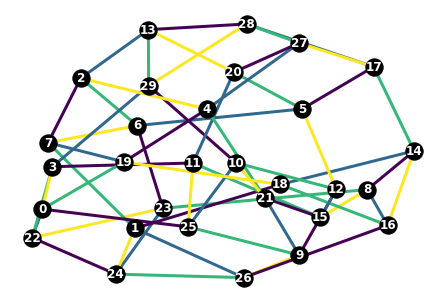

In [7]:
cvec=[]
edgelist=[edg for edg in G.edges ]
for (i,j) in edgelist:
    for c in instance.kolor:
        if value(instance.X[i,j,c])>0:
            cvec.append(c)
l1=nx.draw(G,node_color='black',font_color='white',font_weight='bold',pos=pos, width=3, edge_color=cvec,with_labels=True)